In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [6]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
sc = StandardScaler()

In [12]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
lda = LDA(n_components=13)

In [33]:
X_train_ld = lda.fit_transform(X_train_std,y_train)
X_test_ld = lda.transform(X_test_std)

In [34]:
Individual_descriminability = lda.explained_variance_ratio_
cumulative_descriminability = np.cumsum(lda.explained_variance_ratio_)

In [35]:
X_train_ld.shape

(124, 2)

In [36]:
X_test_ld.shape

(54, 2)

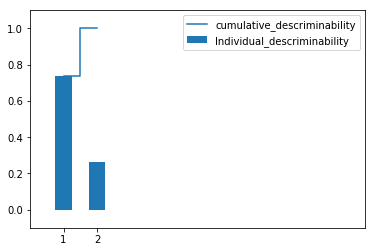

In [40]:
plt.bar(range(1,3),Individual_descriminability,align='center',width=0.5,label='Individual_descriminability')
plt.xticks(range(1,3))
plt.xlim((0,10))
plt.ylim((-0.1,1.1))
plt.step(range(1,3),cumulative_descriminability,where='mid',label='cumulative_descriminability')
plt.legend(loc='best')
plt.show()

In [132]:
lr = LogisticRegression(C=100)

In [133]:
lr.fit(X_train_ld,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
lr.score(X_test_ld,y_test)

1.0

In [141]:
def plot_decision_boundry(X,y,classifier):
    markers = ['s','^','p','*']
    colors = ['gray','green','yellow','blue','red']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx1,xx2,z,cmap=cmap,alpha=0.6)
    plt.ylim((x2_min,x2_max))
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,0],X[y==clas,1],marker=markers[idx],c=colors[clas+1],label=clas,alpha=0.6,s=20)

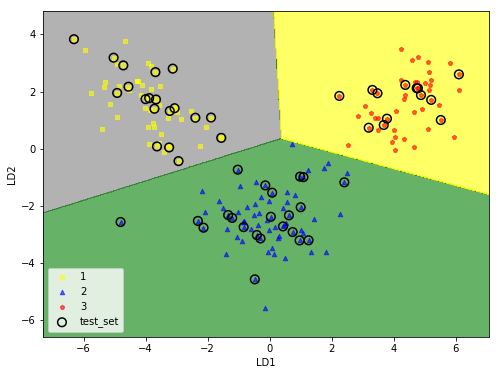

In [142]:
X = np.vstack((X_train_ld,X_test_ld))
y = np.hstack((y_train,y_test))
plot_decision_boundry(X,y,lr)
plt.scatter(X_test_ld[:,0],X_test_ld[:,1],marker='o',c='',edgecolors='black',alpha=1,linewidths=1.5,s=75,label='test_set')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.show()